In [1]:
Consumer_Key = "YapnFvWFoUEjWCh9ps6RIPqm6"
Consumer_Secret = "8JMTzry7iGZqpCEGbpsyjfHNLVMafYVMPNQbuHXCqkY5dvSnsh"
Access_Token = "1011668835970138112-oRcjaxEuixtIUo8CE2KNAzFFBrRENm"
Access_Token_Secret = "h908UNMnyaSsudDSH3zzdWXAJs5Tf2bQeSdCCyYmOvk3K"

In [2]:
import tweepy

In [3]:
auth = tweepy.OAuthHandler(Consumer_Key, Consumer_Secret)
auth.set_access_token(Access_Token, Access_Token_Secret)
api = tweepy.API(auth)

In [28]:
tweets = api.search(q = "unemployement", since = "2020-03-21", count=1000)

In [29]:
print(tweets)

[Status(_api=<tweepy.api.API object at 0x000001AC20AB5DC8>, _json={'created_at': 'Thu May 14 23:11:59 +0000 2020', 'id': 1261071791855816706, 'id_str': '1261071791855816706', 'text': 'DETR implements the federal Pandemic Emergency Unemployement Compensation PEUC extension of benefits, people will b… https://t.co/QtImft6eUF', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/QtImft6eUF', 'expanded_url': 'https://twitter.com/i/web/status/1261071791855816706', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 15593696, 'id_str': '15593696', 'name': '8 News NOW', 'screen_name': '8New

# change it into code cell to install textblob
pip install textblob

In [7]:
import re 
from textblob import TextBlob 

In [30]:
def clean_tweet(tweet): 
    ''' function to clean tweet text by removing links, special characters. '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [31]:
def get_tweet_sentiment(tweet): 
    '''  function to classify sentiment of passed tweet using textblob's sentiment method '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [34]:
tweets1 = []
for tweet in tweets:
    # empty dictionary to store required params of a tweet 
    parsed_tweet = {}
    # saving text of tweet 
    parsed_tweet['text'] = tweet.text 
    # saving sentiment of tweet 
    parsed_tweet['sentiment'] = get_tweet_sentiment(tweet.text) 
    # appending parsed tweet to tweets list 
    if tweet.retweet_count > 0: 
    # if tweet has retweets, ensure that it is appended only once 
        if parsed_tweet not in tweets1: 
            tweets1.append(parsed_tweet) 
    else: 
        tweets1.append(parsed_tweet)


In [35]:
print(tweets1)

[{'text': 'DETR implements the federal Pandemic Emergency Unemployement Compensation PEUC extension of benefits, people will b… https://t.co/QtImft6eUF', 'sentiment': 'neutral'}, {'text': "@tymmcote @AndrewYang So pay employees more so unemployement isn't paying them more :v Prices too high and min wage… https://t.co/zn7RpFlnMD", 'sentiment': 'positive'}, {'text': "My job is rehiring us but we're not going to make nearly as much since we're servers but if I decline my unemployem… https://t.co/WuAT9hKzdA", 'sentiment': 'positive'}, {'text': '@RepFredKeller @realDonaldTrump @newsmax And in the mean time corona deaths are heading towards 100k and unemployem… https://t.co/LMaLBgl9nh', 'sentiment': 'negative'}, {'text': '@TraceyY67515427 Filed once, just pretty much waited it out &amp; was denied regular unemployement and approved for PUA… https://t.co/0ZWTQHt6FT', 'sentiment': 'positive'}, {'text': 'corona Governor Wolf here in PA is actually holding back stimulus funds from whoever opens 

In [54]:
ptweets = [tweet for tweet in tweets1 if tweet['sentiment'] == 'positive'] 

# percentage of positive tweets 
p_per = 100*len(ptweets)/len(tweets1)
print("Positive tweets percentage: ",p_per) 


Positive tweets percentage:  43.85964912280702


In [56]:
# picking negative tweets from tweets 
ntweets = [tweet for tweet in tweets1 if tweet['sentiment'] == 'negative'] 
# percentage of negative tweets 
n_per = 100*len(ntweets)/len(tweets1)
print("Negative tweets percentage: ",n_per) 

Negative tweets percentage:  17.54385964912281


In [57]:
neu_tweets = [tweet for tweet in tweets1 if tweet['sentiment'] == 'neutral'] 
# percentage of negative tweets 
neu_per = 100*len(neu_tweets)/len(tweets1)
print("Neutral tweets percentage:  ",neu_per) 


Neutral tweets percentage:   38.59649122807018


In [47]:
# printing first 10 positive tweets
print("\n\nPositive tweets:") 
for tweet in ptweets[:10]: 
    print(tweet['text']) 
  



Positive tweets:
@tymmcote @AndrewYang So pay employees more so unemployement isn't paying them more :v Prices too high and min wage… https://t.co/zn7RpFlnMD
My job is rehiring us but we're not going to make nearly as much since we're servers but if I decline my unemployem… https://t.co/WuAT9hKzdA
@TraceyY67515427 Filed once, just pretty much waited it out &amp; was denied regular unemployement and approved for PUA… https://t.co/0ZWTQHt6FT
@jgrano305 Yeah, I do know that in every state that people on unemployement are getting a lot of money but I guess you gotta get it first
@jgrano305 Better to have them apply for unemployement, they’ll get more money.
@realDonaldTrump @NYGovCuomo @NYCMayor I would love to have a meeting with president. I’m small biz owner, CEO, Cas… https://t.co/igVwc46Onr
@sunfloweraidil Nope. Main reason why citizens of Maldives are leaving their country is because of youth unemployem… https://t.co/msrvbCqysi
RT @MarcelaforNy: While 30 million Americans filed for

In [48]:
# printing first 5 negative tweets 
print("\n\nNegative tweets:") 
for tweet in ntweets[:10]:
    print(tweet['text']) 




Negative tweets:
@RepFredKeller @realDonaldTrump @newsmax And in the mean time corona deaths are heading towards 100k and unemployem… https://t.co/LMaLBgl9nh
@SerraldeMusic @NorcaL1979 Listen to your workforce, they are the base of your wealth, or you can do the immoral th… https://t.co/0lsJ6o1fyO
RT @Krishna60156649: @Anchorpriyanka_ madam  notice on jssc 
condidate  of ps  has suffered  unemployement due to completing their exam but…
@mommatotwo_ Also unemployement added 600$ a week. I dont make that much at my regular job. Unfortunately some peop… https://t.co/6sajJ3dV54
@Anchorpriyanka_ madam  notice on jssc 
condidate  of ps  has suffered  unemployement due to completing their exam… https://t.co/nMhCfJ2dqh
@lovers_don @TheCitizen_News I agree with the Lock down and the strategy. We are not going to die from unemployemen… https://t.co/ztlz9yHPy0
I have this very vague idea of moving to this one city in the south-east of this country. There’s not many things s… https://t.co/nRGo5R

In [50]:
# printing first 5 neutral tweets 
print("\n\nNeutral tweets:") 
for tweet in neu_tweets[:10]:
    print(tweet['text']) 




Neutral tweets:
DETR implements the federal Pandemic Emergency Unemployement Compensation PEUC extension of benefits, people will b… https://t.co/QtImft6eUF
corona Governor Wolf here in PA is actually holding back stimulus funds from whoever opens up their business  They… https://t.co/hEOF8Jaq6U
@realDonaldTrump Is the unemployement rate already above 30%? #TrumpGate #TrumpsJealousOfObama #TrumpIsAnIdiot 85.5… https://t.co/d08IS8WUys
@lexi4prez the fact that a trillionaire even exist shows how rotten the system is. the difference between a million… https://t.co/RNQCR0gWe6
RT @54and_counting: Dear @BorisJohnson, @RishiSunak has #ForgottenLTD directors are the back bone of the economy.
@Conservatives used to pu…
@RepCohen @CNN @maddow @NBCNews  @CBSNews @kathygriffin  @Rosie @MariahCarey @SpeakerPelosi still haven’t recieved… https://t.co/Ejh8Rsi0dz
RT @NBanicki: @GovHolcomb Do we know why it’s taking 6 weeks to get unemployement for people? Others have been getting paid since it begin

In [59]:
import matplotlib.pyplot as plt


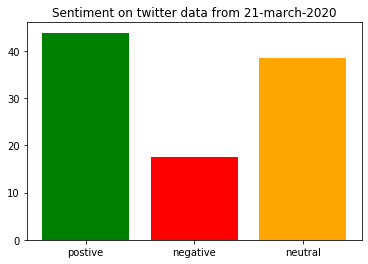

In [65]:
plt.title("Sentiment on twitter data from 21-march-2020")
plt.bar(["postive","negative","neutral"],[p_per,n_per,neu_per], color = ["green","red","orange"])
plt.show()
